Una empresa prestadora de servicios de telecomunicaciones le encarga a usted la realización de un análisis completo que permita reconocer el comportamiento de este sector a nivel nacional. Considere que la principal actividad de la empresa es brindar acceso a internet, pero también es importante considerar el comportamiento asociado al resto de los servicios de comunicación, con el fin de orientar a la empresa en brindar una buena calidad de sus servicios, identificar oportunidades de crecimiento y poder plantear soluciones personalizadas a sus posibles clientes.

Con el fin de monitorear la eficacia de los objetivos de la empresa, se le pide visualizar en un dashboard el siguiente KPI y establecer 3 KPIs adicionales producto de su análisis:

Aumentar en un 2% el acceso al servicio de internet para el próximo trimestre, cada 100 hogares, por provincia.

Análisis Exploratorio de los datos (Exploratory Data Analysis = EDA)

El reporte debe incluir un resumen de estadísticas descriptivas de los datasets, análisis univariados (por ejemplo, distribución de variables numéricas), análisis bivariados (correlación entre variables numéricas y/o categóricas) y cualquier análisis que le ayude al mejor entendimiento de los datos (encontrar patrones, outliers y/o anomalías, entre otros). El reporte debe presentarse en un notebook (.ipynb) con adecuado uso de markdowns y comentarios.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df_baf = pd.read_csv('Datasets\Internet_BAF.csv', thousands= '.' , encoding= 'utf-8')
df_ingresos = pd.read_csv('Datasets\Internet_Ingresos.csv', thousands= '.' , encoding= 'utf-8')
df_penetracion_internet = pd.read_csv('Datasets\Internet_Penetracion.csv', thousands= '.' , encoding= 'utf-8') 
df_acceso_velocidad = pd.read_csv('Datasets\Internet_Accesos-por-velocidad.csv', thousands= '.' , encoding= 'utf-8')
df_acceso_tecnologia = pd.read_csv('Datasets\Internet_Accesos-por-tecnologia.csv', thousands= '.' , encoding= 'utf-8')
df_velocidad_trimestre = pd.read_csv('Datasets\historico_velocidad_internet.csv', thousands= '.', decimal = ',', encoding= 'utf-8') 
df_acceso_tecnologia_2 = pd.read_csv('Datasets\AccesosaInternetfijoportecnologiaylocalidad.csv', thousands= '.' , encoding= 'utf-8')

Áreas para crecer: provincia con baja velocidades, baja penetraión, tecnología viejas -> si tengo la capacidad para invertir y la condición económica de la provincia lo permite.  
Caso San Luis, mucho WIRELESS, esa tecnología no permite un ancho de banda muy grande -> más ancho de banda, más velocidad, más ingreso (si la demanda lo requiere)

ADLS: tecnología de línea de abonado digital DSL. Consiste en la transmisión de datos digitales apoyada en el cable de pares simétricos de cobre que lleva la línea telefónica convencional o línea de abonado (este viejo)
CABLEMODEM: internet por cable es un tipo de acceso de banda ancha a Internet.  
DIAL UP: conexión que utiliza un medio telefónico analógico, como la red telefónica conmutada fija, o digital como GSM, pero cuyo objeto principal es la telefonía de voz. (este viejo)   
FIBRAOPTICA: conexión que utiliza un medio telefónico analógico, como la red telefónica conmutada fija, o digital como GSM, pero cuyo objeto principal es la telefonía de voz.  
4G/3G: cuarta y tercera generación de tecnologías de telefonía móvil  
TELEFONIA FIJA: teléfono que utiliza una línea telefónica con alambre de metal, cobre o fibra óptica, para la transmisión a diferencia de un móvil de línea celular, que utiliza ondas de radio para la transmisión.  
WIRELESS: comunicación en la que no se utiliza un medio de propagación físico, sino que se utiliza modulación de ondas electromagnéticas, radiaciones  
SATELITAL: comunicación que emplea como soporte un satélite, que se localiza en la órbita terrestre y está diseñado para la emisión y recepción de señales de radiofrecuencia.

NORMALIZO LOS DATASETS

In [6]:
df_baf = df_baf.applymap(lambda x: x.lower() if type(x) == str else x)
df_ingresos = df_ingresos.applymap(lambda x: x.lower() if type(x) == str else x)
df_penetracion_internet = df_penetracion_internet.applymap(lambda x: x.lower() if type(x) == str else x)
df_acceso_velocidad = df_acceso_velocidad.applymap(lambda x: x.lower() if type(x) == str else x)
df_acceso_tecnologia = df_acceso_tecnologia.applymap(lambda x: x.lower() if type(x) == str else x)
df_velocidad_trimestre = df_velocidad_trimestre.applymap(lambda x: x.lower() if type(x) == str else x)
df_acceso_tecnologia_2 = df_acceso_tecnologia_2.applymap(lambda x: x.lower() if type(x) == str else x)

In [7]:
# Seleccionar solo las columnas que contengan strings
cols_con_strings = df_baf.select_dtypes(include='object').columns
# Aplicar el método str.title() a las columnas seleccionadas
df_baf[cols_con_strings] = df_baf[cols_con_strings].apply(lambda x: x.str.title())

# Seleccionar solo las columnas que contengan strings
cols_con_strings = df_penetracion_internet.select_dtypes(include='object').columns
# Aplicar el método str.title() a las columnas seleccionadas
df_penetracion_internet[cols_con_strings] = df_penetracion_internet[cols_con_strings].apply(lambda x: x.str.title())

# Seleccionar solo las columnas que contengan strings
cols_con_strings = df_acceso_velocidad.select_dtypes(include='object').columns
# Aplicar el método str.title() a las columnas seleccionadas
df_acceso_velocidad[cols_con_strings] = df_acceso_velocidad[cols_con_strings].apply(lambda x: x.str.title())

# Seleccionar solo las columnas que contengan strings
cols_con_strings = df_velocidad_trimestre.select_dtypes(include='object').columns
# Aplicar el método str.title() a las columnas seleccionadas
df_velocidad_trimestre[cols_con_strings] = df_velocidad_trimestre[cols_con_strings].apply(lambda x: x.str.title())

# Seleccionar solo las columnas que contengan strings
cols_con_strings = df_acceso_tecnologia_2.select_dtypes(include='object').columns
# Aplicar el método str.title() a las columnas seleccionadas
df_acceso_tecnologia_2[cols_con_strings] = df_acceso_tecnologia_2[cols_con_strings].apply(lambda x: x.str.title())

Acceso a internet por tecnología por localidad/partido/provincia


In [8]:
df_acceso_tecnologia_2.head()

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general,Unnamed: 13
0,Buenos Aires,25 De Mayo,25 De Mayo,6854100,873,4.704,- 0,2,- 0,975,- 0,664,7.218,NaN
1,Buenos Aires,25 De Mayo,Del Valle,6854020,181,- 0,- 0,- 0,10,1,- 0,- 0,192,NaN
2,Buenos Aires,25 De Mayo,Gobernador Ugarte,6854040,- 0,- 0,- 0,- 0,- 0,- 0,- 0,181,181,NaN
3,Buenos Aires,25 De Mayo,Norberto De La Riestra,6854060,- 0,782,- 0,6,167,- 0,- 0,327,1.282,NaN
4,Buenos Aires,25 De Mayo,Lucas Monteverde,6854050,- 0,- 0,- 0,- 0,- 0,- 0,- 0,6,6,NaN


In [9]:
df_acceso_tecnologia_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provincia      3142 non-null   object 
 1   Partido        3142 non-null   object 
 2   Localidad      3142 non-null   object 
 3   Link Indec     3142 non-null   object 
 4   ADSL           3142 non-null   object 
 5   CABLEMODEM     3142 non-null   object 
 6   DIAL UP        3142 non-null   object 
 7   FIBRA OPTICA   3142 non-null   object 
 8   OTROS          3142 non-null   object 
 9   SATELITAL      3142 non-null   object 
 10  WIMAX          3142 non-null   object 
 11  WIRELESS       3142 non-null   object 
 12  Total general  3142 non-null   object 
 13  Unnamed: 13    0 non-null      float64
dtypes: float64(1), object(13)
memory usage: 343.8+ KB


In [10]:
df_acceso_tecnologia_2['Provincia'].unique()

array(['Buenos Aires', 'Caba', 'Catamarca', 'Chaco', 'Chubut', 'Cordoba',
       'Corrientes', 'Entre Rios', 'Formosa', 'Jujuy', 'La Pampa',
       'La Rioja', 'Mendoza', 'Misiones', 'Neuquen', 'Rio Negro', 'Salta',
       'San Juan', 'San Luis', 'Santa Cruz', 'Santa Fe',
       'Santiago Del Estero', 'Tierra Del Fuego', 'Tucuman'], dtype=object)

In [11]:
df_acceso_tecnologia_2['Provincia'] = df_acceso_tecnologia_2['Provincia'].replace('Caba', 'Capital Federal')
df_acceso_tecnologia_2['Provincia'] = df_acceso_tecnologia_2['Provincia'].replace('Cordoba', 'Córdoba')
df_acceso_tecnologia_2['Provincia'] = df_acceso_tecnologia_2['Provincia'].replace('Entre Rios', 'Entre Ríos')
df_acceso_tecnologia_2['Provincia'] = df_acceso_tecnologia_2['Provincia'].replace('Neuquen', 'Neuquén')
df_acceso_tecnologia_2['Provincia'] = df_acceso_tecnologia_2['Provincia'].replace('Rio Negro', 'Río Negro')
df_acceso_tecnologia_2['Provincia'] = df_acceso_tecnologia_2['Provincia'].replace('Tucuman', 'Tucumán')

In [12]:
df_acceso_tecnologia_2 = df_acceso_tecnologia_2.replace({"- 0": 0})

In [13]:
df_acceso_tecnologia_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provincia      3142 non-null   object 
 1   Partido        3142 non-null   object 
 2   Localidad      3142 non-null   object 
 3   Link Indec     3142 non-null   object 
 4   ADSL           3142 non-null   object 
 5   CABLEMODEM     3142 non-null   object 
 6   DIAL UP        3142 non-null   object 
 7   FIBRA OPTICA   3142 non-null   object 
 8   OTROS          3142 non-null   object 
 9   SATELITAL      3142 non-null   object 
 10  WIMAX          3142 non-null   object 
 11  WIRELESS       3142 non-null   object 
 12  Total general  3142 non-null   object 
 13  Unnamed: 13    0 non-null      float64
dtypes: float64(1), object(13)
memory usage: 343.8+ KB


In [14]:
df_acceso_tecnologia_2.drop(columns = ['Unnamed: 13'], inplace=True)

In [15]:
df_acceso_tecnologia_2.columns

Index(['Provincia', 'Partido', 'Localidad', 'Link Indec', 'ADSL', 'CABLEMODEM',
       'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS',
       'Total general'],
      dtype='object')

In [16]:
df_acceso_tecnologia_2.to_csv('df_acceso_tecnologia_2.csv', index=False)

Acceso a internet por tecnología con tiempo

In [17]:
df_acceso_tecnologia.head()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2022,3,1395277,6031970,2871541,557110,235230,11091128,jul-sept 2022
1,2022,2,1468333,5979214,2723285,556243,231609,10958684,abr-jun 2022
2,2022,1,1533240,6073426,2219533,545814,251996,10624009,ene-mar 2022
3,2021,4,1657615,5984240,2072236,523107,252596,10489794,oct-dic 2021
4,2021,3,1950631,5826257,1566048,492415,250190,10085541,jul-sept 2021


In [18]:
def fecha_trimestre(row):
    trimestre = row['Trimestre']
    year = row['Año']
    
    if trimestre == 1:
        fecha = pd.to_datetime(f'{year}-01-01')
    elif trimestre == 2:
        fecha = pd.to_datetime(f'{year}-04-01')
    elif trimestre == 3:
        fecha = pd.to_datetime(f'{year}-07-01')
    elif trimestre == 4:
        fecha = pd.to_datetime(f'{year}-10-01')
    
    return fecha

df_acceso_tecnologia['Fecha'] = df_acceso_tecnologia.apply(fecha_trimestre, axis=1)

In [19]:
df_acceso_tecnologia.to_csv('df_acceso_tecnologia.csv', index=False)

In [20]:
df_acceso_tecnologia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Año           35 non-null     int64         
 1   Trimestre     35 non-null     int64         
 2   ADSL          35 non-null     int64         
 3   Cablemodem    35 non-null     int64         
 4   Fibra óptica  35 non-null     int64         
 5   Wireless      35 non-null     int64         
 6   Otros         35 non-null     int64         
 7   Total         35 non-null     int64         
 8   Periodo       35 non-null     object        
 9   Fecha         35 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(8), object(1)
memory usage: 2.9+ KB


PROMEDIO DE VELOCIDAD DE BAJADA (MBPS) POR TRIMESTRE

In [21]:
df_velocidad_trimestre.head()

,Año,Trimestre,Mbps (Media de bajada),Trimestre.1
0,2022,3,62.46,Jul-Sept 2022
1,2022,2,58.44,Abr-Jun 2022
2,2022,1,55.11,Ene-Mar 2022
3,2021,4,52.34,Oct-Dic 2021
4,2021,3,48.46,Jul-Sept 2021


In [22]:
def fecha_trimestre(row):
    trimestre = row['Trimestre']
    year = row['Año']
    
    if trimestre == 1:
        fecha = pd.to_datetime(f'{year}-01-01')
    elif trimestre == 2:
        fecha = pd.to_datetime(f'{year}-04-01')
    elif trimestre == 3:
        fecha = pd.to_datetime(f'{year}-07-01')
    elif trimestre == 4:
        fecha = pd.to_datetime(f'{year}-10-01')
    
    return fecha

df_velocidad_trimestre['Fecha'] = df_velocidad_trimestre.apply(fecha_trimestre, axis=1)

In [23]:
df_velocidad_trimestre.head()

,Año,Trimestre,Mbps (Media de bajada),Trimestre.1,Fecha
0,2022,3,62.46,Jul-Sept 2022,2022-07-01
1,2022,2,58.44,Abr-Jun 2022,2022-04-01
2,2022,1,55.11,Ene-Mar 2022,2022-01-01
3,2021,4,52.34,Oct-Dic 2021,2021-10-01
4,2021,3,48.46,Jul-Sept 2021,2021-07-01


In [24]:
df_velocidad_trimestre.to_csv('df_velocidad_trimestre.csv', index=False)

In [25]:
df_velocidad_trimestre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Año                     35 non-null     int64         
 1   Trimestre               35 non-null     int64         
 2   Mbps (Media de bajada)  35 non-null     float64       
 3   Trimestre.1             35 non-null     object        
 4   Fecha                   35 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 1.5+ KB


TABLA DE CANTIDAD SEGÚN VELOCIDAD (MBPS) POR PROVINCIA

In [26]:
df_acceso_velocidad.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,3,Buenos Aires,29985,27709,290315,297915,267044,124190,3618689,65821.0,4721668
1,2022,3,Capital Federal,517,5742,34371,67829,51946,28692,1253105,105477.0,1547679
2,2022,3,Catamarca,71,384,3107,5389,5099,3737,50298,2208.0,70293
3,2022,3,Chaco,461,987,16782,18938,8049,15828,79390,3711.0,144146
4,2022,3,Chubut,109,1444,45707,30940,34682,15309,17563,20024.0,165778


In [27]:
df_acceso_velocidad['Provincia'].unique()

array(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
       'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán'],
      dtype=object)

In [28]:
df_acceso_tecnologia_2['Provincia'].unique()

array(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
       'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán'],
      dtype=object)

In [29]:
df_penetracion_internet['Provincia'].unique()

array(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
       'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán'],
      dtype=object)

In [30]:
df_acceso_velocidad.columns

Index(['Año', 'Trimestre', 'Provincia', 'HASTA 512 kbps',
       '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps',
       '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS',
       'Total'],
      dtype='object')

In [31]:
# Seleccionar las columnas a sumar
cols_to_sum = df_acceso_velocidad.iloc[:, 3:9]

# Sumar las columnas a lo largo del eje de las columnas
df_acceso_velocidad['-30 Mbps'] = cols_to_sum.sum(axis=1)

# Elimino las columnas sobrantes
df_acceso_velocidad.drop(['HASTA 512 kbps','+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps','+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps'], axis=1, inplace=True)

#cambio el orden de las columnas
df_acceso_velocidad = df_acceso_velocidad.reindex(columns=['Año', 'Trimestre', 'Provincia','-30 Mbps', '+ 30 Mbps', 'OTROS', 'Total'])

In [32]:
df_acceso_velocidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Año        840 non-null    int64  
 1   Trimestre  840 non-null    int64  
 2   Provincia  840 non-null    object 
 3   -30 Mbps   840 non-null    int64  
 4   + 30 Mbps  840 non-null    int64  
 5   OTROS      834 non-null    float64
 6   Total      840 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 46.1+ KB


In [33]:
df_acceso_velocidad['OTROS'].unique() #tine nulos, procedo a rellenarlo con 0
df_acceso_velocidad['OTROS'].fillna(0, inplace=True)
#los valores de la columna 'OTROS' están en formato float, los paso a int
df_acceso_velocidad['OTROS'] = df_acceso_velocidad['OTROS'].astype(int)

In [34]:
def fecha_trimestre(row):
    trimestre = row['Trimestre']
    year = row['Año']
    
    if trimestre == 1:
        fecha = pd.to_datetime(f'{year}-01-01')
    elif trimestre == 2:
        fecha = pd.to_datetime(f'{year}-04-01')
    elif trimestre == 3:
        fecha = pd.to_datetime(f'{year}-07-01')
    elif trimestre == 4:
        fecha = pd.to_datetime(f'{year}-10-01')
    
    return fecha

df_acceso_velocidad['Fecha'] = df_acceso_velocidad.apply(fecha_trimestre, axis=1)

In [35]:
df_acceso_velocidad.to_csv('df_acceso_velociadad.csv', index=False)

ACCESO A INTERNET CADA 100 HOGARES

In [36]:
df_penetracion_internet.tail()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
835,2014,1,Santa Cruz,"28,94"
836,2014,1,Santa Fe,"47,85"
837,2014,1,Santiago Del Estero,"16,31"
838,2014,1,Tierra Del Fuego,"63,97"
839,2014,1,Tucumán,"33,42"


In [37]:
df_penetracion_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           840 non-null    int64 
 1   Trimestre                     840 non-null    int64 
 2   Provincia                     840 non-null    object
 3   Accesos por cada 100 hogares  840 non-null    object
dtypes: int64(2), object(2)
memory usage: 26.4+ KB


In [38]:
def fecha_trimestre(row):
    trimestre = row['Trimestre']
    year = row['Año']
    
    if trimestre == 1:
        fecha = pd.to_datetime(f'{year}-01-01')
    elif trimestre == 2:
        fecha = pd.to_datetime(f'{year}-04-01')
    elif trimestre == 3:
        fecha = pd.to_datetime(f'{year}-07-01')
    elif trimestre == 4:
        fecha = pd.to_datetime(f'{year}-10-01')
    
    return fecha

df_penetracion_internet['Fecha'] = df_penetracion_internet.apply(fecha_trimestre, axis=1)

Realizo el KPI primero en py

In [39]:
df_penetracion_internet["Accesos por cada 100 hogares"] = df_penetracion_internet["Accesos por cada 100 hogares"].str.replace(",", ".").astype(float)

In [40]:
# Ordenar los datos por provincia y trimestre
df_penetracion_internet = df_penetracion_internet.sort_values(['Año', 'Trimestre'])

# Calcular la variación porcentual entre el último y el anteúltimo trimestre de cada provincia
df_penetracion_internet["Variacion porcentual"] = df_penetracion_internet.groupby("Provincia")["Accesos por cada 100 hogares"].pct_change()

## rellenar los valores nulos con ceros en la columna "variacion"
df_penetracion_internet['Variacion porcentual'] = df_penetracion_internet['Variacion porcentual'].fillna(0)

In [41]:
df_penetracion_internet = df_penetracion_internet.sort_values(['Provincia', 'Fecha'], ascending=[True, True])
df_penetracion_internet['KPI (+2%)'] = round((df_penetracion_internet['Accesos por cada 100 hogares'].shift(1) * 0.02) + df_penetracion_internet['Accesos por cada 100 hogares'].shift(1), 2)
# rellenar los valores nulos con ceros en la columna "variacion"
df_penetracion_internet['KPI (+2%)'] = df_penetracion_internet['KPI (+2%)'].fillna(0)

In [42]:
df_penetracion_internet.to_csv('df_penetracion_internet.csv', index=False)

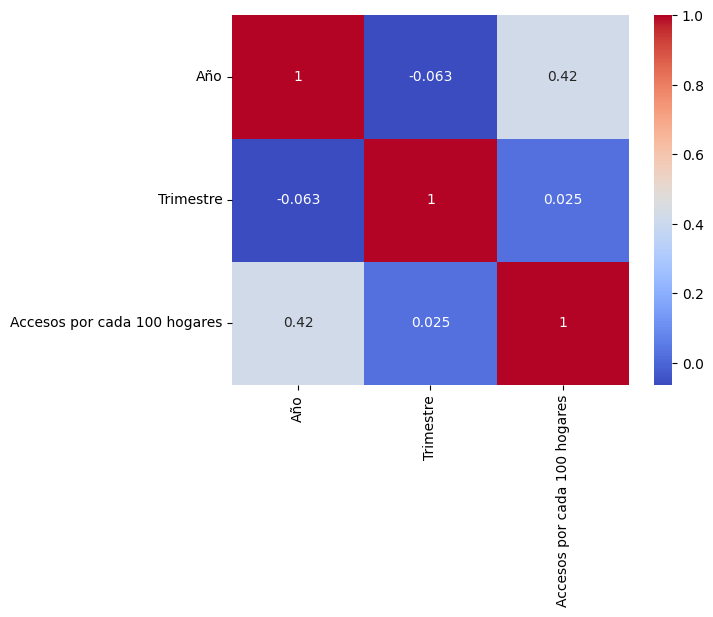

In [43]:
corr = df_penetracion_internet[['Año', 'Trimestre', 'Accesos por cada 100 hogares']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

INGRESOS EN PESOS POR TRIMESTRE

In [44]:
df_ingresos.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,3,67055930,jul-sept 2022
1,2022,2,60335724,abr-jun 2022
2,2022,1,55589997,ene-mar 2022
3,2021,4,45467887,oct-dic 2021
4,2021,3,42999944,jul-sept 2021


In [45]:
df_ingresos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Año                        35 non-null     int64 
 1   Trimestre                  35 non-null     int64 
 2   Ingresos (miles de pesos)  35 non-null     int64 
 3   Periodo                    35 non-null     object
dtypes: int64(3), object(1)
memory usage: 1.2+ KB


In [46]:
def fecha_trimestre(row):
    trimestre = row['Trimestre']
    year = row['Año']
    
    if trimestre == 1:
        fecha = pd.to_datetime(f'{year}-01-01')
    elif trimestre == 2:
        fecha = pd.to_datetime(f'{year}-04-01')
    elif trimestre == 3:
        fecha = pd.to_datetime(f'{year}-07-01')
    elif trimestre == 4:
        fecha = pd.to_datetime(f'{year}-10-01')
    
    return fecha

df_ingresos['Fecha'] = df_ingresos.apply(fecha_trimestre, axis=1)

In [47]:
df_ingresos.to_csv('df_ingresos.csv', index=False)

CANTIDAD DE BANDA ANCHA FIJA POR PROVINCIA

In [48]:
df_baf.head()

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,3,Buenos Aires,4715469,6.199,4721668
1,2022,3,Capital Federal,1545534,2.145,1547679
2,2022,3,Catamarca,70292,1,70293
3,2022,3,Chaco,144141,5,144146
4,2022,3,Chubut,164874,904,165778


In [49]:
df_baf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               840 non-null    int64 
 1   Trimestre         840 non-null    int64 
 2   Provincia         840 non-null    object
 3   Banda ancha fija  840 non-null    int64 
 4   Dial up           838 non-null    object
 5   Total             840 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 39.5+ KB


In [50]:
def fecha_trimestre(row):
    trimestre = row['Trimestre']
    year = row['Año']
    
    if trimestre == 1:
        fecha = pd.to_datetime(f'{year}-01-01')
    elif trimestre == 2:
        fecha = pd.to_datetime(f'{year}-04-01')
    elif trimestre == 3:
        fecha = pd.to_datetime(f'{year}-07-01')
    elif trimestre == 4:
        fecha = pd.to_datetime(f'{year}-10-01')
    
    return fecha

df_baf['Fecha'] = df_baf.apply(fecha_trimestre, axis=1)

In [51]:
df_baf['Dial up'].fillna(0, inplace=True)
df_baf['Dial up'] = df_baf['Dial up'].str.replace("- 0", "0")
df_baf.info()
df_baf.to_csv('df_BAF.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Año               840 non-null    int64         
 1   Trimestre         840 non-null    int64         
 2   Provincia         840 non-null    object        
 3   Banda ancha fija  840 non-null    int64         
 4   Dial up           838 non-null    object        
 5   Total             840 non-null    int64         
 6   Fecha             840 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 46.1+ KB
